# Term Project (Veera Reddy Koppula)

Your dataset

A PowerPoint presentation outlining your statistical question/hypothesis

    A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
    
    Describe what the 5 variables mean in the dataset (Chapter 1).
    
    Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
    
    Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).
    
    Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).
    
    Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).
    
    Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).
    
    Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).
    
    Conduct a test on your hypothesis using one of the methods covered in Chapter 9.
    
    For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

Your code or screenshots of your code

A 250-500-word paper summarizing the following: Statistical/Hypothetical Question

    Outcome of your EDA
    
    What do you feel was missed during the analysis?
    
    Were there any variables you felt could have helped in the analysis?
    
    Were there any assumptions made you felt were incorrect?
    
    What challenges did you face, what did you not fully understand?

Submit a link to your repository to the assignment link during the final week of class.

In [1]:
#importing necessary librarires
import numpy as np #import numpy as np
import pandas as pd #import pandas as pd
from collections import Counter #import collections module
import matplotlib.pyplot as plt #import matplotlib
import statsmodels.formula.api as smf #import statsmodels
%matplotlib inline
import sys
import seaborn as sns #import seaborn module
from scipy import stats #import scipy module
import thinkstats2 #import thinkstats2 module
import thinkplot #import thinkplot module
import scipy.stats
from scipy import stats #import sipy and stats module
from sklearn.linear_model import LinearRegression #import sklearn module for models
from sklearn.metrics import r2_score

Workin off of data set - https://www.kaggle.com/toramky/automobile-dataset/version/2
    Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

In [2]:
#Reading data file from local machine
autoMobile = pd.read_csv("Automobile_data.csv") #Reading file using pandas read csv function
autoMobile.head() #show the first 5 rows of the read DF

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
autoMobile.shape

(205, 26)

There are 205 rows and 26 columns

In [4]:
autoMobile.info() #showing the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#check for any null rows
autoMobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Describe what the 5 variables mean in the dataset (Chapter 1)**

In [7]:
autoMobile.describe()#describing the count,mean,std, min, max and quartiles

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
autoMobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
autoMobile['bore'].loc[autoMobile['bore'] == '?'].count() # checking ? to replace

4

In [11]:
# Identify missing value normalized-losses. then impute with mean calucated from non missing values
autoMobile1 = autoMobile['normalized-losses'].loc[autoMobile['normalized-losses'] != '?'] #get non ? values in to a df
autoMobile1Mean = autoMobile1.astype(str).astype(int).mean() #compute mean value of the df from above step
autoMobile['normalized-losses'] = autoMobile['normalized-losses'].replace('?',autoMobile1Mean).astype(int)#replace ? values with mean value calcuated above step
autoMobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

Replced ? with mean values

In [12]:
# Identify missing value price. then impute with mean calucated from non missing values
autoMobileprice = autoMobile['price'].loc[autoMobile['price'] != '?']#get non ? values in to a df
autoMobilepricemean = autoMobileprice.astype(str).astype(int).mean()  #compute mean value of the df from above step
autoMobile['price'] = autoMobile['price'].replace('?',autoMobilepricemean).astype(int)#replace ? values with mean value calcuated above step
autoMobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [13]:
# Identify missing value horsepower. then impute with mean calucated from non missing values
autoMobilehorsepower = autoMobile['horsepower'].loc[autoMobile['horsepower'] != '?']#get non ? values in to a df
autoMobilehorsepoweremean = autoMobilehorsepower.astype(str).astype(int).mean()  #compute mean value of the df from above step
autoMobile['horsepower'] = autoMobile['horsepower'].replace('?',autoMobilehorsepoweremean).astype(int)#replace ? values with mean value calcuated above step
autoMobile['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [14]:
autoMobile['num-of-doors'].loc[autoMobile['num-of-doors'] == '?'] #finding num-of-doors values that are not valid
autoMobile = autoMobile[autoMobile['num-of-doors'] != '?']
autoMobile['num-of-doors'].loc[autoMobile['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [15]:
autoMobile['bore'].loc[autoMobile['bore'] == '?'] #finding bore values that are not valid

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [18]:
# Identify missing value bore. then impute with mean calucated from non missing values
autoMobileBore = autoMobile['bore'].loc[autoMobile['bore'] != '?']#get non ? values in to a df
autoMobileBoremean = autoMobileBore.astype(str).astype(float).mean()  #compute mean value of the df from above step
autoMobile['bore'] = autoMobile['bore'].replace('?',autoMobileBoremean).astype(float)#replace ? values with mean value calcuated above step
autoMobile['bore'].head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [19]:
autoMobile['bore'].loc[autoMobile['bore'] == '?'] #finding bore values that are not valid

Series([], Name: bore, dtype: float64)

In [20]:
autoMobile['bore'] = pd.to_numeric(autoMobile['bore'],errors='coerce') #converting the bore values from non numaric to numaric

In [21]:
autoMobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [22]:
autoMobile['stroke'] = pd.to_numeric(autoMobile['stroke'],errors='coerce') #clearning stroke data types from object to float64
autoMobile['peak-rpm'] = pd.to_numeric(autoMobile['peak-rpm'],errors='coerce')#clearning peak-rpm types from object to float64

autoMobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [23]:
autoMobilenumofdoors = autoMobile[autoMobile['num-of-doors'] != '?'] #finding num-of-doors with ? and replacing it will non ? value
autoMobile['num-of-doors'].loc[autoMobilenumofdoors['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [24]:
autoMobile.duplicated().value_counts() #checking for duplicates in am data frames

False    203
dtype: int64

**Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).**

In [25]:
autoMobile.median() #Medain values of the df

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10595.00
dtype: float64

In [26]:
autoMobile.mean() #Mean values of the df

symboling                0.837438
normalized-losses      121.871921
wheel-base              98.781281
length                 174.113300
width                   65.915271
height                  53.731527
curb-weight           2557.916256
engine-size            127.073892
bore                     3.330955
stroke                   3.254070
compression-ratio       10.093202
horsepower             104.463054
peak-rpm              5125.870647
city-mpg                25.172414
highway-mpg             30.699507
price                13241.911330
dtype: float64

In [27]:
autoMobile.tail() #tail for the df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,19,25,22625


In [28]:
autoMobile.describe() #spread of the df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.271327,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [29]:
#removing outliers for normalized-losses with quantiles in less than 0.1 and more than 0.99

q_low = autoMobile["normalized-losses"].quantile(0.01)
q_hi  = autoMobile["normalized-losses"].quantile(0.99)
df_filtered = autoMobile[(autoMobile["normalized-losses"] < q_hi) & (autoMobile["normalized-losses"] > q_low)] #get vlues higher than 0.01 and less than 0.99 outliers
df_filtered

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470


Text(0.5, 0, 'Make')

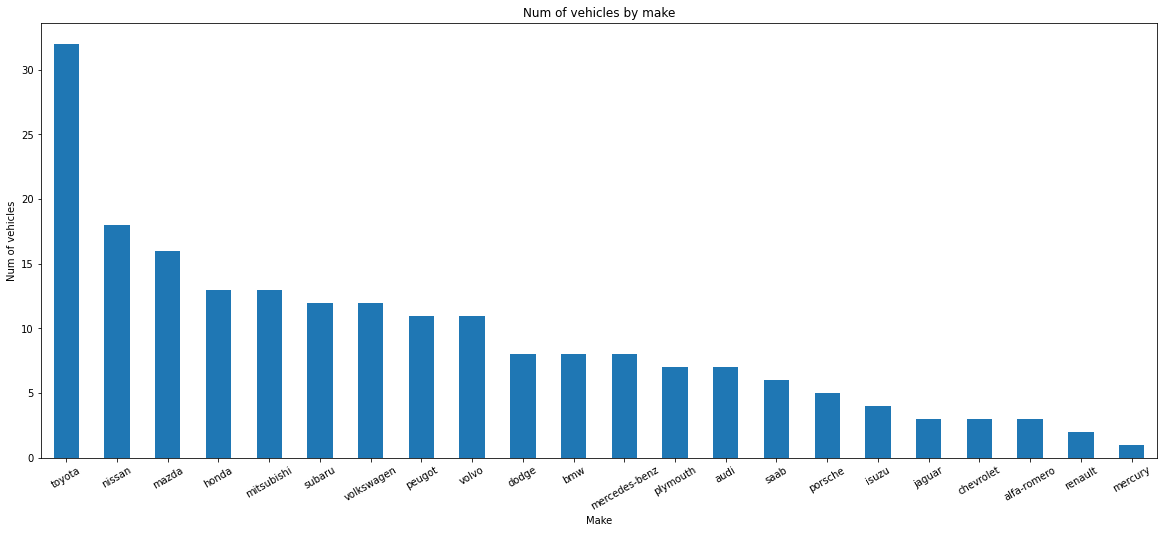

In [30]:
autoMobile.make.value_counts().nlargest(40).plot(kind='bar', figsize=(20,8)) #get the count groupby make form data frame amdf
plt.title("Num of vehicles by make") #title of the plot
plt.ylabel('Num of vehicles') #Y axis label
plt.xticks(rotation=30) #rotate x axis lable to 30 degrees
plt.xlabel('Make') #X axis label

Observation:-
Car maker toyota has most number of vehicles 40% than the the next highest from Nissan

Text(0.5, 0, 'Risk rating')

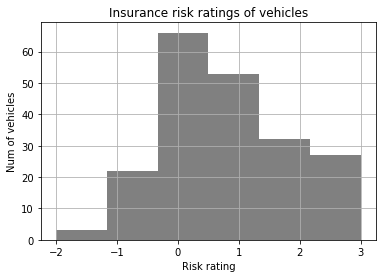

In [31]:
autoMobile.symboling.hist(bins=6, color='grey') #plot symboling with 6 bins and grey color
plt.title("Insurance risk ratings of vehicles") #title of the char
plt.ylabel('Num of vehicles') #y axis label
plt.xlabel('Risk rating') #x Axis label

Observation:-
There are more cars in the range of 0 and 1 than other distributions

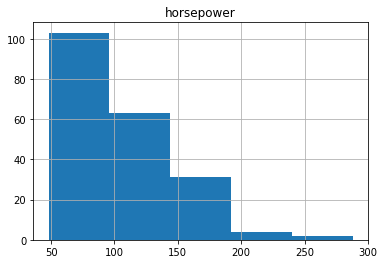

In [32]:
autoMobile[["horsepower"]].hist(bins=5)#plot horsepower with 5 bins with default color
plt.show()

Text(0.5, 0, 'Normalized-losses')

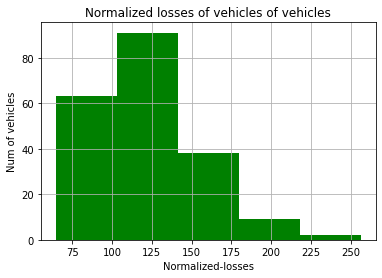

In [33]:
autoMobile['normalized-losses'].hist(bins=5,color='green')#plot normalized-losses with56 bins and green color
plt.title("Normalized losses of vehicles of vehicles") #title of the chart
plt.ylabel('Num of vehicles') #y label
plt.xlabel('Normalized-losses') #x label

Observation:-
more vehciles in the range of 100 to 150 than any other bucket

Text(0.5, 0, 'Fuel Type')

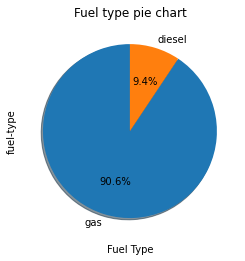

In [36]:
autoMobile['fuel-type'].value_counts().plot.pie( autopct='%1.1f%%',
        shadow=True, startangle=90) #Pie chart of fuel types
plt.title("Fuel type pie chart") #title of chart
plt.xlabel('Fuel Type') #Xlable

Observation:-
Most vehicles fuel type of choice is gas vs diesel having more than 80% of the choice

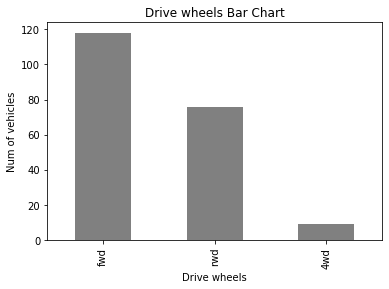

In [35]:
autoMobile['drive-wheels'].value_counts().plot(kind='bar',color='grey') #bar chart for 
plt.title("Drive wheels Bar Chart")
plt.ylabel('Num of vehicles')
plt.xlabel('Drive wheels');

Observation:-
front wheel drive vehicles leads the way followed by rwd and 4 wd.

**Histograms plotted with bin size 3**

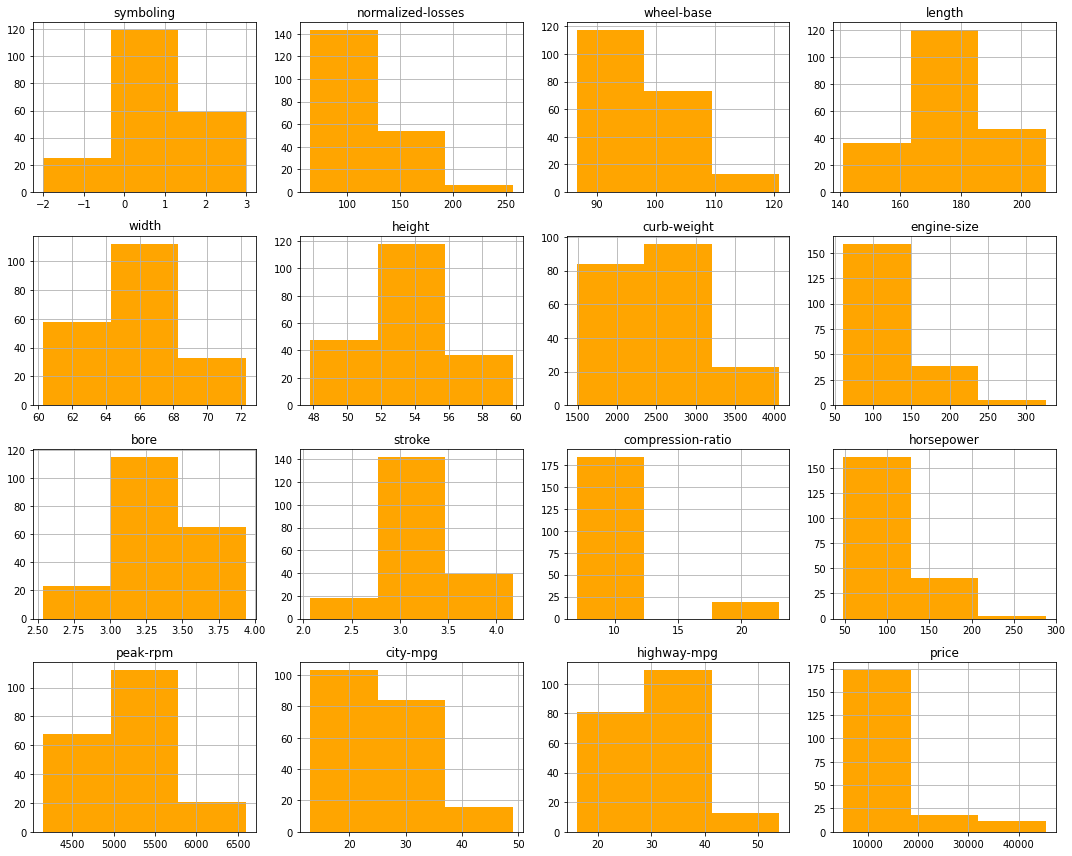

In [38]:
autoMobile.hist(bins=3,figsize=(15,12), color='orange')
plt.tight_layout()

Observation:-
Curb weight of the cars are distributed between 1500 and 4000 approximately

**Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter.**


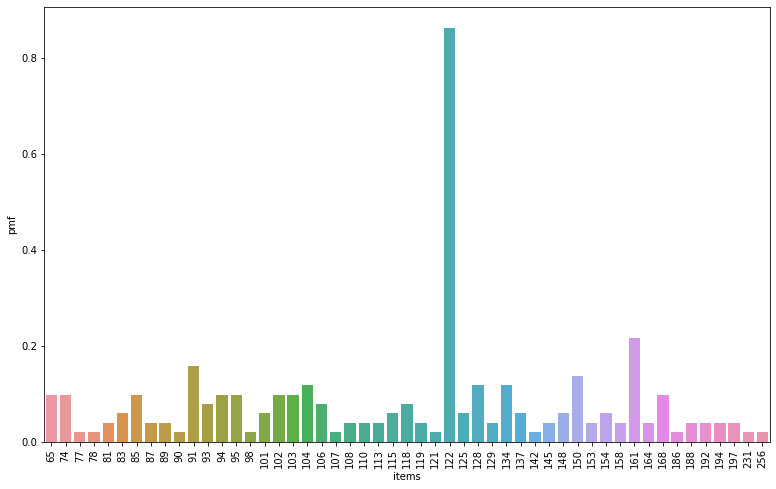

In [42]:
probabilities1 = autoMobile["normalized-losses"].value_counts() #get count of each normalized-losses for all of the orginal DF
sum2=len(probabilities1) #get the total count of the dataset
df3=pd.DataFrame(probabilities1) #make df3 as dataframe from probabilites series
df3['items']=df3.index #get indexs to 'items' column
df3['pmf']=df3["normalized-losses"]/sum2 #calulcate PMF, as  each count / total count
plt.figure(figsize=(13,8)) #plot the figure 13,8
x=df3['items']
y=df3['pmf']
barplotprob=sns.barplot(x=x,y=y) #plot barplot for the total PMF values in DF
rotx = barplotprob.set_xticklabels(barplotprob.get_xticklabels(), rotation=90) #rotate x by 90 and lables

PMF of FILTERED out 122 normalixed-losses (PMF goes up for rest removing one longpole influening 122 value)

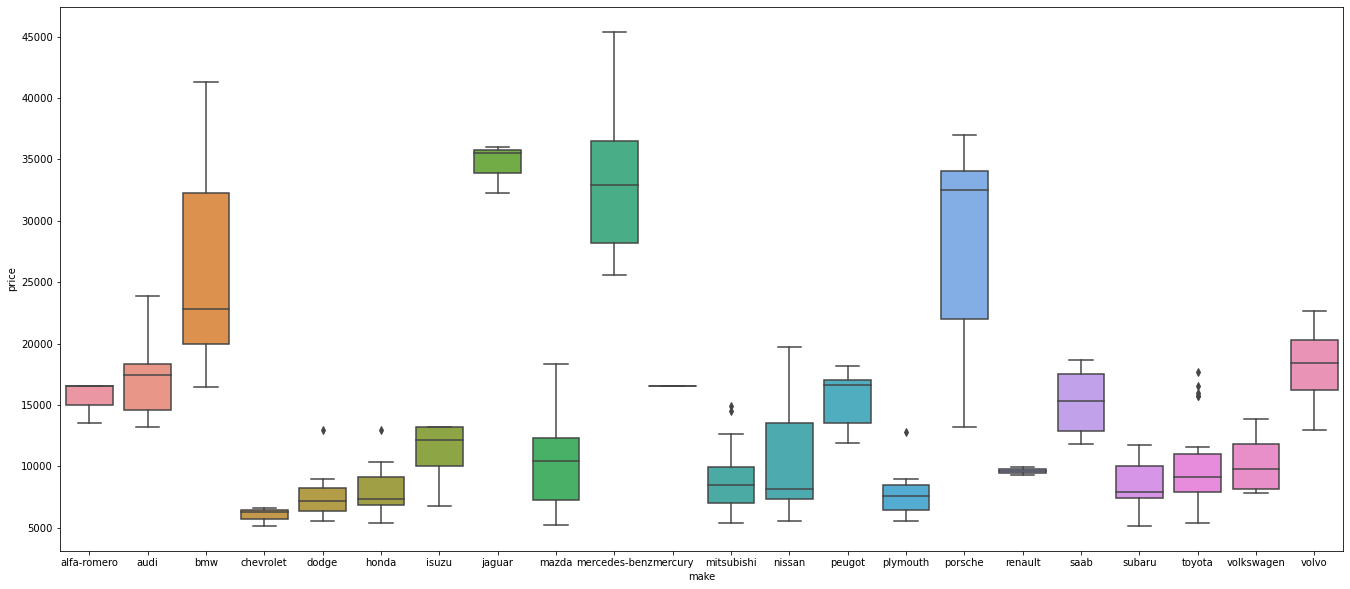

In [43]:
plt.rcParams['figure.figsize']=(23,10) #figure size 23,10
ax = sns.boxplot(x="make", y="price", data=autoMobile) #boxplot for make and price

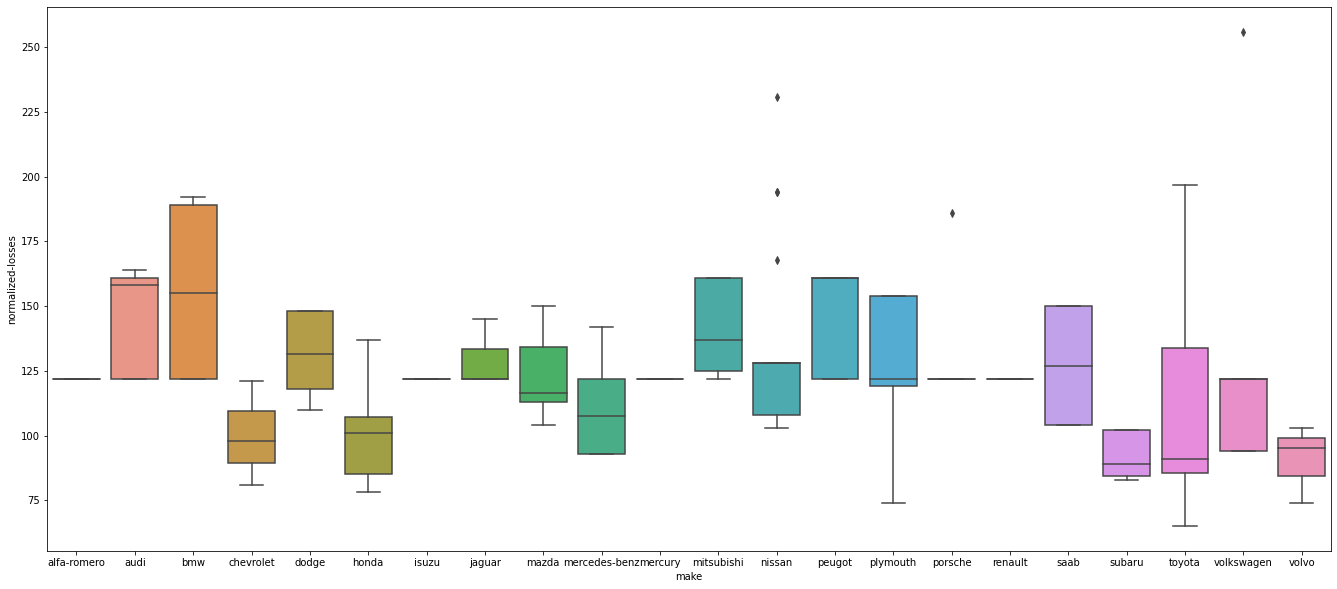

In [44]:
plt.rcParams['figure.figsize']=(23,10) #figure size 23,10
ax = sns.boxplot(x="make", y="normalized-losses", data=autoMobile)#boxplot for make and normalised-losses

Observation:- 

From the above two box plots, it is evident the Depreciation losses in use as compared to other cars are high for BMW,Audi,Mistibushi ,SAAB and Peugot.

while Toyota , Honda, Chevrolet and volvo are depreciated quite less in the entire lot of cars.

From price of the car and to depreciation value, Mercedez-Benz wins well in high cost luxary cars.

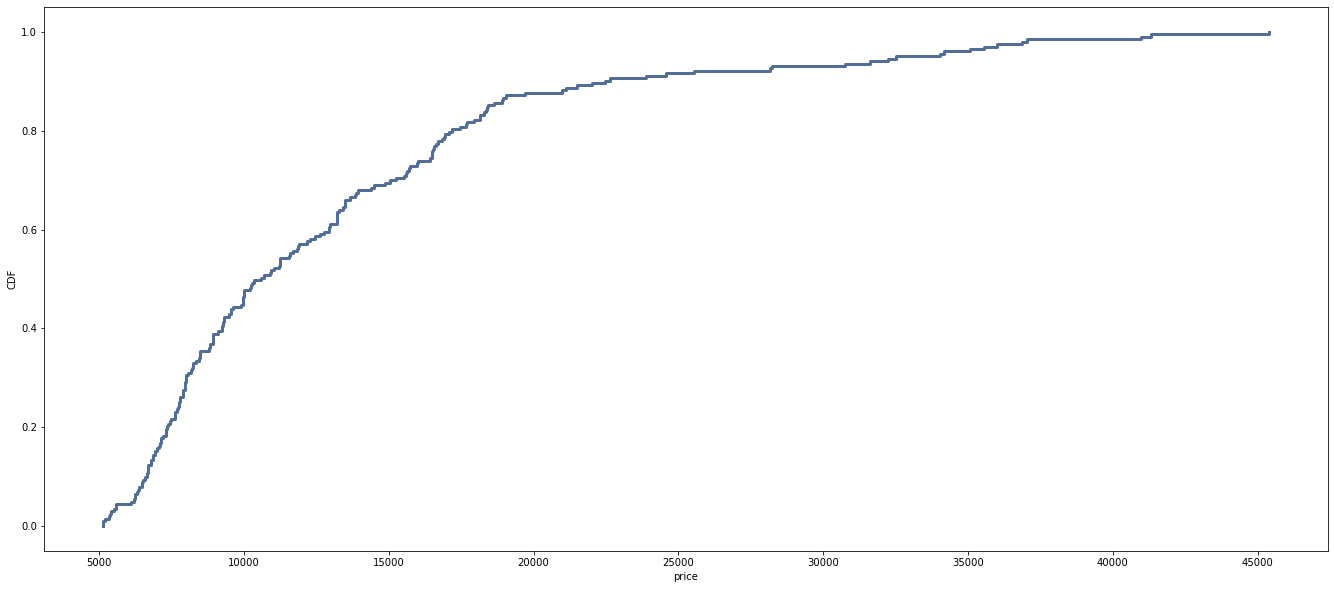

<Figure size 576x432 with 0 Axes>

In [46]:
cdf = thinkstats2.Cdf(autoMobile["price"]) #calculate CDF of price using thinkstat2 module
thinkplot.Cdf(cdf) #plot CDF value
thinkplot.Show(xlabel="price", ylabel="CDF") #x and y label values

Observation:-

Based on Price CDF About 90% of car are below 20000, whcih is much higher than the mean and median values (13241.9 & 10595)

and the last 10% is above 40000 prices

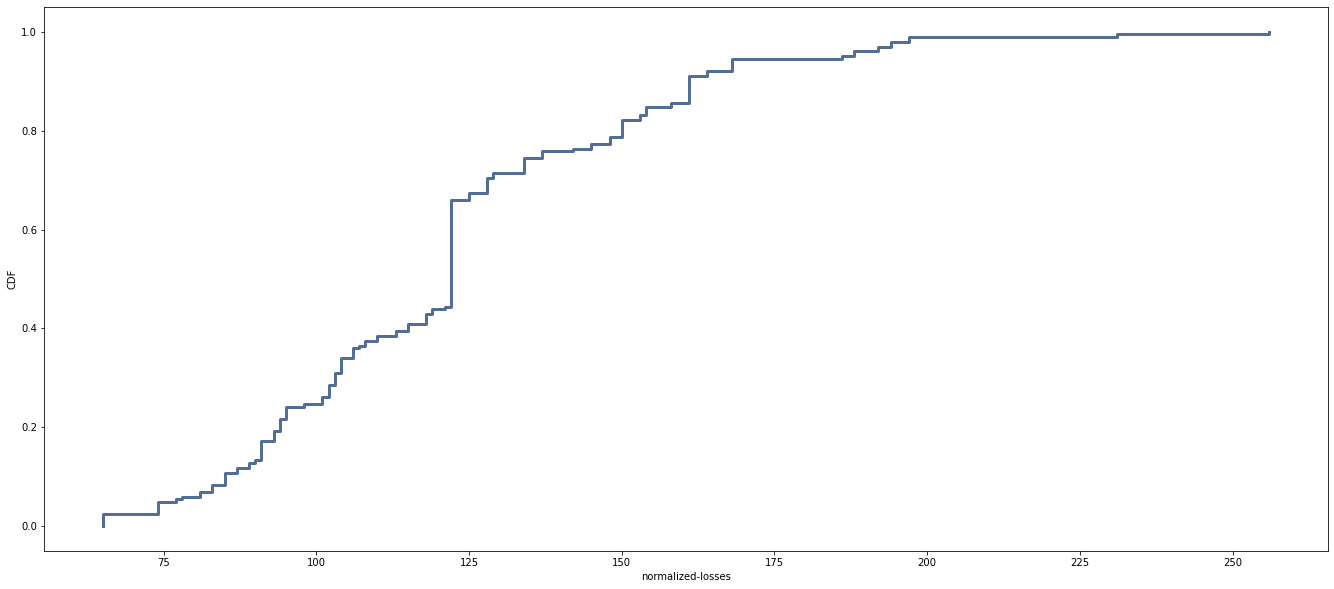

<Figure size 576x432 with 0 Axes>

In [48]:
cdf = thinkstats2.Cdf(autoMobile["normalized-losses"])#calculate CDF of normalized-losses using thinkstat2 module
thinkplot.Cdf(cdf) #plot CDF value
thinkplot.Show(xlabel="normalized-losses", ylabel="CDF")#x and y label values

Observations:-
    Based on CDF of normalized loses, it is evident Losses does not deviate much post around 125 and remaind there for most part of 50-70% of cars life
    
Best bang for the money is buying a used car right about 45% past the life of the car, there on the depreciation is not much

**Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).**

In [49]:
cdf = thinkstats2.Cdf(autoMobile["normalized-losses"])#calculate CDF of normalized-losses using thinkstat2 module

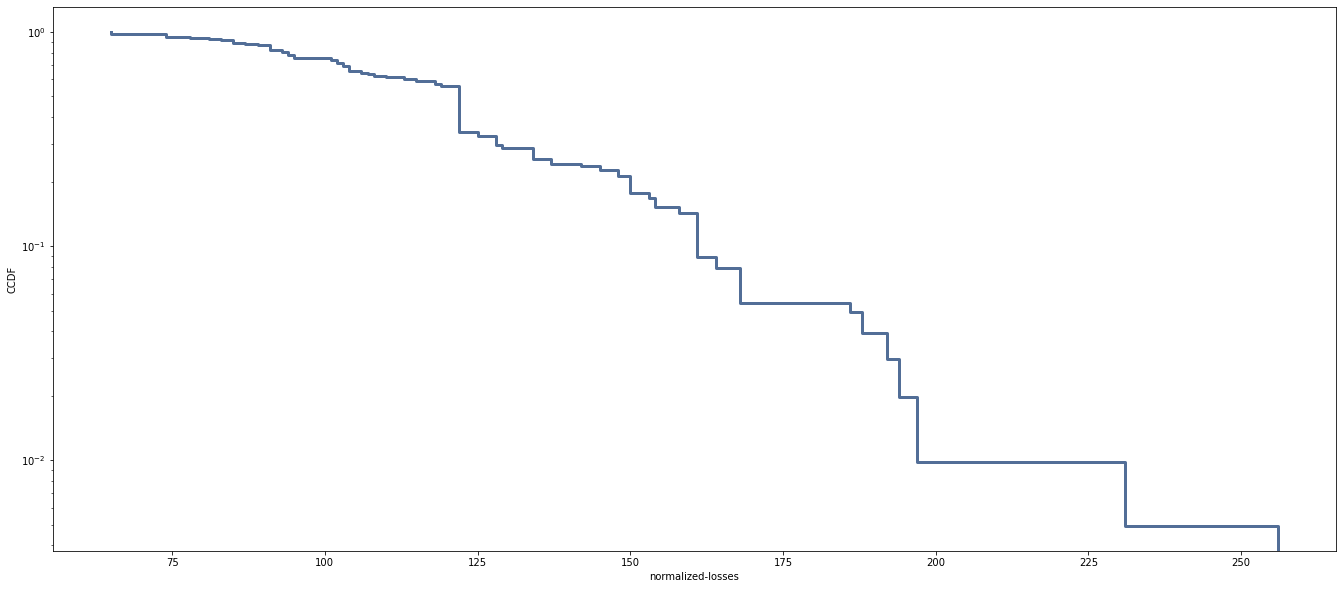

<Figure size 576x432 with 0 Axes>

In [50]:
thinkplot.Cdf(cdf, complement=True) #plotting CDF with complemtn is True that is inverst of CDF
thinkplot.Show(xlabel='normalized-losses',ylabel='CCDF',yscale='log') #x and y labels with log scale

Observations:-
The line is not flat,exponential distribution is not a perfect model for this data. Depreciation is not linear across the car models.

**Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).**

In [55]:
priceSeries=autoMobile.price #get price Series

In [56]:
normalizedSeries=autoMobile['normalized-losses'] #get normalized-losses Series

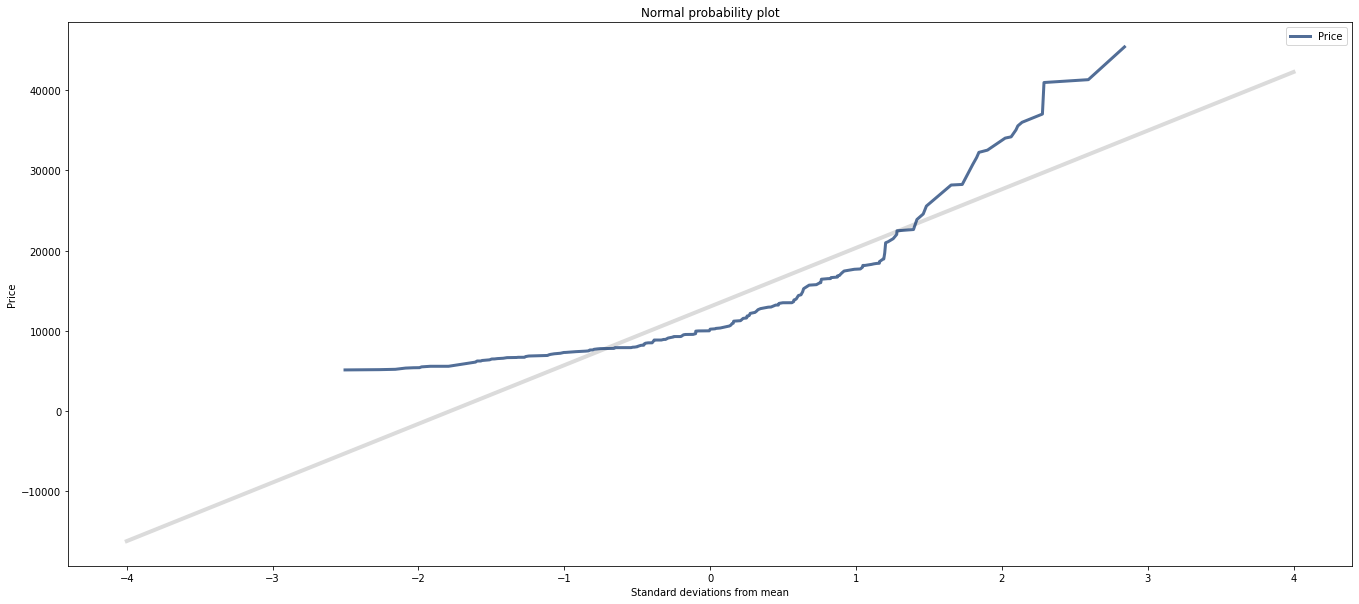

In [57]:
mean, var = thinkstats2.TrimmedMeanVar(priceSeries, p=0.01) #trimming outliers of price and get mean and var
std = np.sqrt(var) #get standard deviation

xs = [-4,4] #scale of x
fxs, fys = thinkstats2.FitLine(xs, mean, std) #fitting lines for mean and standard deviation
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8') #plot normal porb dist chart

xs, ys = thinkstats2.NormalProbability(priceSeries) #Get normal probability line 
thinkplot.Plot(xs, ys, label='Price') #plot the NP on fitline

thinkplot.Config(title='Normal probability plot', #title of chart
                 xlabel='Standard deviations from mean', #x label
                 ylabel='Price') #y label

Observation:-
    
The normal probability plot shows lower end of car prices are cheaper than normal mode and cars are pricier at the higher end

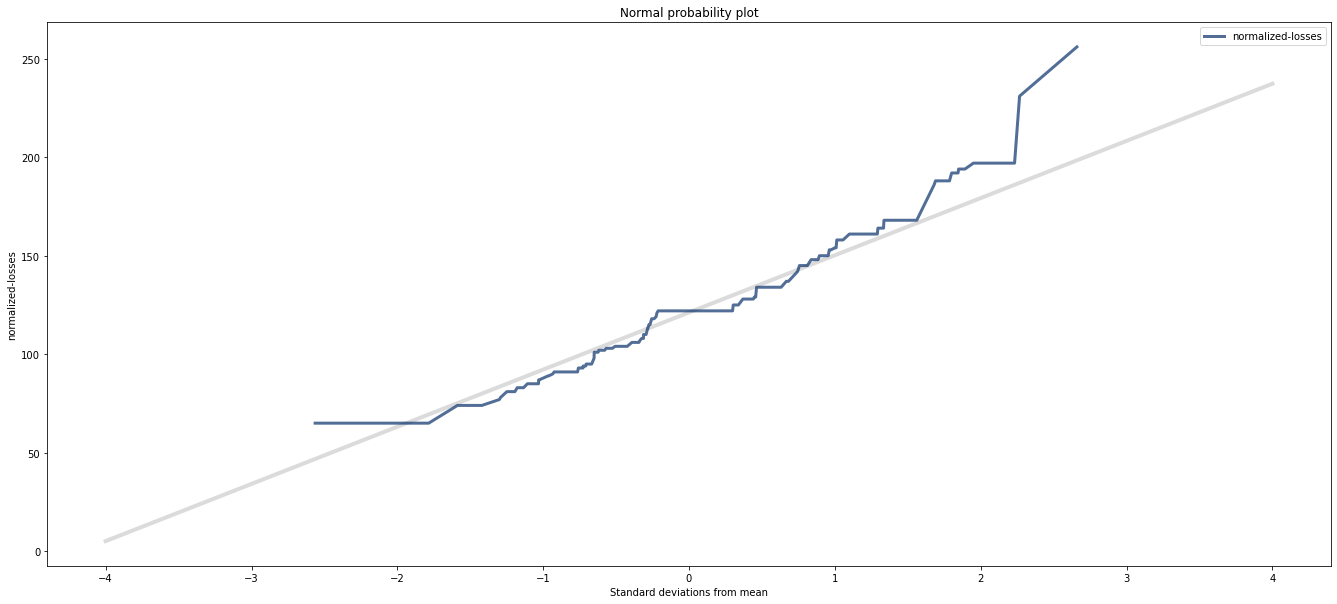

In [59]:
mean, var = thinkstats2.TrimmedMeanVar(normalizedSeries, p=0.01) #trimming outliers of price and get mean and var
std = np.sqrt(var) #get standard deviation

xs = [-4,4] #scale of x
fxs, fys = thinkstats2.FitLine(xs, mean, std) #fitting lines for mean and standard deviation
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8') #plot normal porb dist chart

xs, ys = thinkstats2.NormalProbability(normalizedSeries) #Get normal probability line 
thinkplot.Plot(xs, ys, label='normalized-losses') #plot the NP on fitline

thinkplot.Config(title='Normal probability plot', #title of chart
                 xlabel='Standard deviations from mean', #x label
                 ylabel='normalized-losses') #y label

Observation:-

Depreciation is higher as the higher end luxary cars, which deviates from Normal distributions

**Create two scatter plots comparing two variables and provide your analysis on correlation and causation.**

**Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).**

In [61]:
autoMobilecols=['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'horsepower',
 'city-mpg',
 'highway-mpg'] #get column names for integer values
print('Given Price')
for i in autoMobilecols: #loop through columns
    pearsoncoef,pvalue=stats.pearsonr(autoMobile[i],autoMobile["price"]) #caluclate pearson coefficients for each colum against price
    print("For {} pearson coefficient is {} ".format(i,pearsoncoef,pvalue))#print corresponding coefficients and P value

Given Price
For symboling pearson coefficient is -0.08301993976238642 
For normalized-losses pearson coefficient is 0.13677016817097581 
For wheel-base pearson coefficient is 0.5823786680800347 
For length pearson coefficient is 0.6834936293988823 
For width pearson coefficient is 0.7289172034774369 
For height pearson coefficient is 0.13261369723972546 
For curb-weight pearson coefficient is 0.8204391954941141 
For engine-size pearson coefficient is 0.8615447387770896 
For compression-ratio pearson coefficient is 0.0759922214547708 
For horsepower pearson coefficient is 0.7590057204838158 
For city-mpg pearson coefficient is -0.6707658566722718 
For highway-mpg pearson coefficient is -0.6937011821271692 


Observation:-
the higher the price, the higher the horsepower and lower the city and highway miles

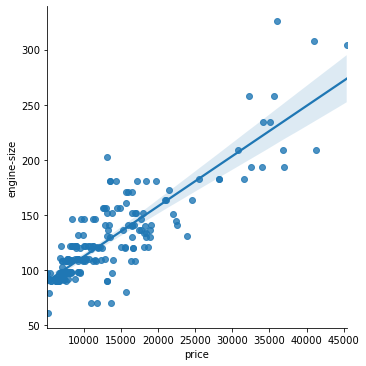

In [66]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)#ignoring warnings
sns.lmplot('price',"engine-size", autoMobile); #scattor plotting price and engine size

Observation:-
the higher the price, the higher the horsepower (linear)

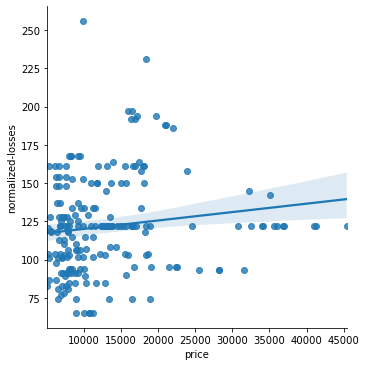

In [67]:
sns.lmplot('price','normalized-losses', autoMobile); #scattor plotting price and engine size

Observation:-
No linear relationship, but it appears deprecations for higher end cars remain flat after 25000 price treshold

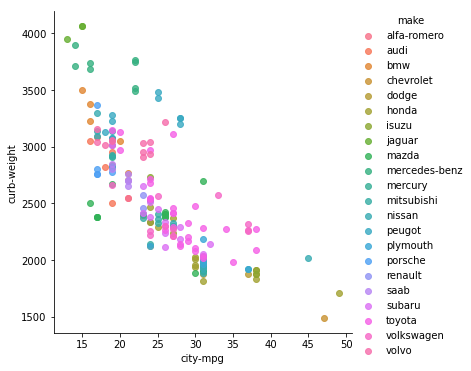

In [69]:
sns.lmplot('city-mpg',"curb-weight", autoMobile, hue="make", fit_reg=False);

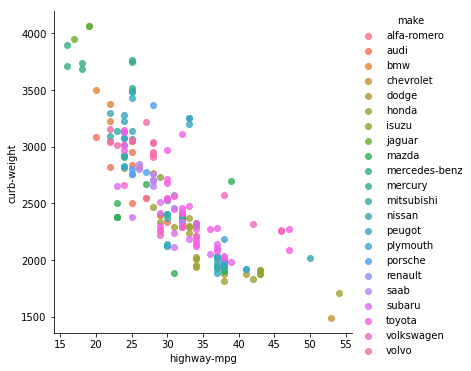

In [71]:
sns.lmplot('highway-mpg',"curb-weight", autoMobile, hue="make", fit_reg=False);

Observation:-
Both city and highway miles are effected by curb weight of the car

In [73]:
autoMobile.cov()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.562552,18.513730,-4.024345,-5.519609,-0.624238,-1.652770,-1.492711e+02,-5.537434,-0.043767,-0.003097,-0.837645,3.382578,163.518657,-0.249061,0.346949,-8.197274e+02
normalized-losses,18.513730,1010.260742,-10.235083,9.746266,6.050975,-28.578615,1.676232e+03,151.628323,-0.214199,0.543645,-14.233350,257.539799,3615.863184,-45.636224,-39.177291,3.433823e+04
wheel-base,-4.024345,-10.235083,36.493608,65.196834,10.320238,8.680247,2.449239e+03,143.453370,0.797412,0.316674,5.968595,84.540394,-1047.206965,-18.747252,-22.805653,2.778969e+04
length,-5.519609,9.746266,65.196834,152.253139,22.295192,14.656856,5.665871e+03,352.241092,2.020371,0.525358,7.398987,273.530444,-1682.567786,-54.984978,-60.728657,6.661736e+04
width,-0.624238,6.050975,10.320238,22.295192,4.623677,1.440209,9.745419e+02,66.059757,0.324774,0.127844,1.495674,55.073587,-224.107836,-9.153141,-10.143903,1.238060e+04
height,-1.652770,-28.578615,8.680247,14.656856,1.440209,5.965932,3.751111e+02,6.495184,0.109085,-0.042661,2.411032,-10.421107,-371.072761,-0.898532,-1.934539,2.558570e+03
curb-weight,-149.271107,1676.231795,2449.238524,5665.871416,974.541879,375.111069,2.730659e+05,18570.332951,91.842999,28.726111,318.665666,15578.672633,-67041.011194,-2601.653807,-2882.693606,3.386491e+06
engine-size,-5.537434,151.628323,143.453370,352.241092,66.059757,6.495184,1.857033e+04,1746.999463,6.606720,2.757281,4.788970,1346.039872,-4913.146766,-179.745476,-196.027191,2.844422e+05
bore,-0.043767,-0.214199,0.797412,2.020371,0.324774,0.109085,9.184300e+01,6.606720,0.073618,-0.004728,-0.001826,6.231640,-32.844253,-1.051113,-1.110259,1.139447e+03
stroke,-0.003097,0.543645,0.316674,0.525358,0.127844,-0.042661,2.872611e+01,2.757281,-0.004728,0.101138,0.231986,1.154378,-10.474593,-0.095489,-0.104808,2.135719e+02


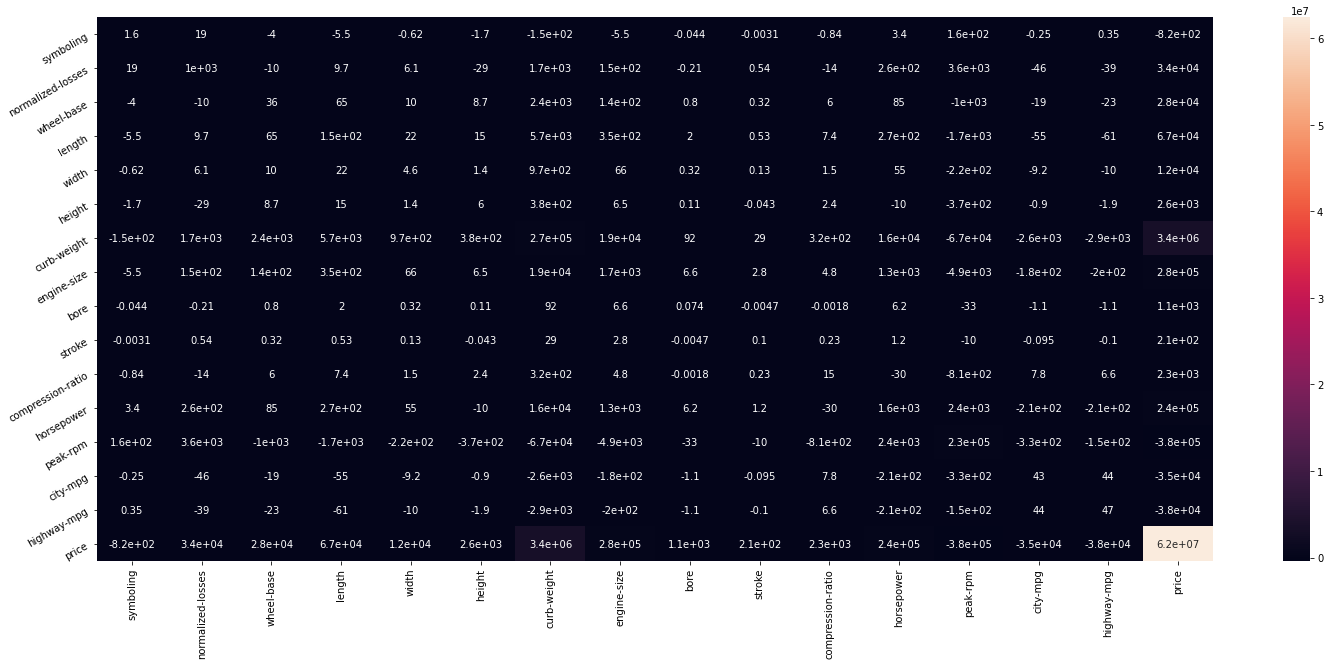

In [74]:
cover = autoMobile.cov()#create covariance matrix
plt.figure(figsize=(25,10)) #create plot with 13,8 size
heatmapforautoMobile = sns.heatmap(cover, annot=True) #heatmap for correation showing annotations using seaborn module
rotx = heatmapforautoMobile.set_xticklabels(heatmapforautoMobile.get_xticklabels(), rotation=90) #show x lables at 90 degree angle
roty = heatmapforautoMobile.set_yticklabels(heatmapforautoMobile.get_yticklabels(), rotation=30) #show y lable at 30 degree angle

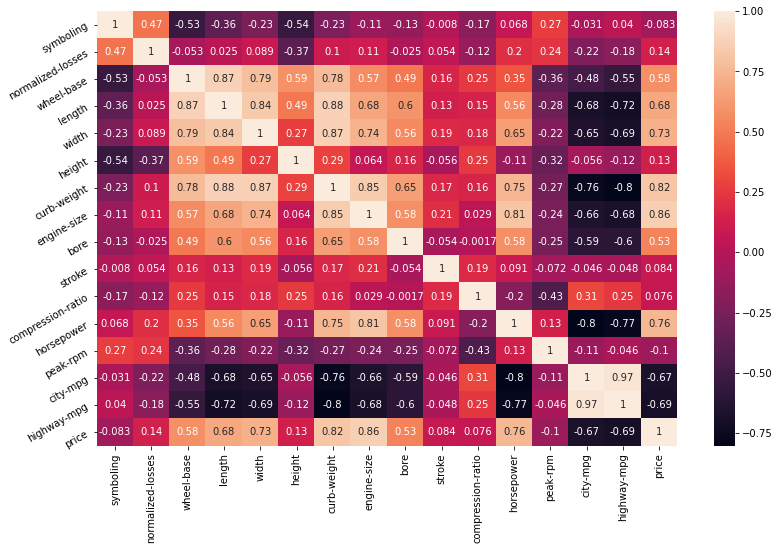

In [75]:
corr = autoMobile.corr() #create correlation matrix
plt.figure(figsize=(13,8)) #create plot with 13,8 size
heatmapforautoMobile = sns.heatmap(corr, annot=True) #heatmap for correation showing annotations using seaborn module
rotx = heatmapforautoMobile.set_xticklabels(heatmapforautoMobile.get_xticklabels(), rotation=90) #show x lables at 90 degree angle
roty = heatmapforautoMobile.set_yticklabels(heatmapforautoMobile.get_yticklabels(), rotation=30) #show y lable at 30 degree angle

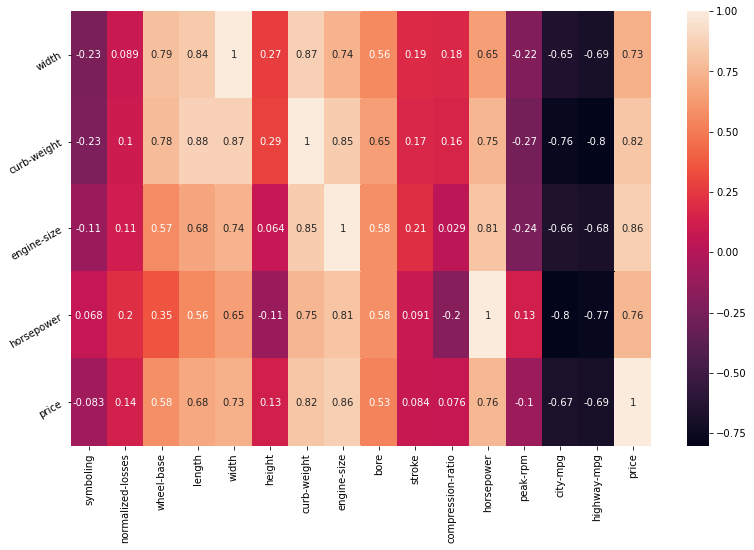

In [76]:
dt=autoMobile.corr()
dt1=dt[dt["price"]>0.7]
plt.figure(figsize=(13,8)) #create plot with 13,8 size
heatmapforautoMobile = sns.heatmap(dt1, annot=True) #heatmap for correation showing annotations using seaborn module
rotx = heatmapforautoMobile.set_xticklabels(heatmapforautoMobile.get_xticklabels(), rotation=90) #show x lables at 90 degree angle
roty = heatmapforautoMobile.set_yticklabels(heatmapforautoMobile.get_yticklabels(), rotation=30) #show y lable at 30 degree angle

Observation:-
    
Price is more correlated with engine size and curb weight of the car along with price(0.86 and 0.82)

Wheel base is correlated with length and width of the car (0.87 and 0.79)

Mileage is inversely corelated to horsepower

**Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**

Hypothisis is front wheel drive vehicles give higher millage than rare wheel drive and all wheel drive
So, Null Hypothisis is front wheel drive gives less millage than rare wheel and all wheel drive

In [78]:
class DiffMeansPermute(thinkstats2.HypothesisTest): #Create a class to perform hypothisis test

    def TestStatistic(self, data): #data is a pair of sequences from rarewheel drive and front wheel drive.
        group1, group2 = data #split the date in two seq
        test_stat = abs(group1.mean() - group2.mean()) #mean differenc btw the two sequence
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data#split the date in two seq
        self.n, self.m = len(group1), len(group2) #get rare wheel drive and front wheel drive lengths
        self.pool = np.hstack((group1, group2))  #stack the sequence of input arrays horizontally(by column)

    def RunModel(self):
        np.random.shuffle(self.pool) #shuffling the hstack pool
        data = self.pool[:self.n], self.pool[self.n:]  #packing back the split data back in to data
        return data

In [79]:
df4wd = autoMobile[autoMobile["drive-wheels"]=='4wd'] #get 4wd data in to df4wd df
df4wdS= df4wd["city-mpg"] #get sequence of city-mpg values for 4wheel drive

In [80]:
dfrwd = autoMobile[autoMobile["drive-wheels"]=='rwd'] #get rare wheel drive data in to  df
dfrwdS=dfrwd["city-mpg"]#get sequence of city-mpg values for rare wheel drive

In [81]:
dffwd = autoMobile[autoMobile["drive-wheels"]=='fwd'] #get front wheel drive data in to df
dffwdS=dffwd["city-mpg"]#get sequence of city-mpg values for front wheel drive

In [82]:
data = df4wdS,dffwdS #combining the sequence

In [83]:
ht = DiffMeansPermute(data) #callong permutation function
pvalue = ht.PValue() #get the p-value
pvalue #display P value

0.018

In [84]:
group_data=autoMobile[["drive-wheels","city-mpg"]].groupby(by=["drive-wheels"],as_index=False).mean() #group by data for drive wheels and city mpg;d get mean value for each kind of drives
group_data

,drive-wheels,city-mpg
0,4wd,23.111111
1,fwd,28.288136
2,rwd,20.578947


Observation:-

from Permutation test above, it is evident that fwd gives less millage is proven right with very low P value. So, it did not happen by sampling issues and also looking at the actual values, front wheel drive has avg of 28.28 compared to 20.57 for rare wheel drive and 23.11 for all wheel drive.

**For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).**

In [85]:
linearregressionmodel=LinearRegression() #linear regression function in to variable
xs=autoMobile[['city-mpg']] #get x value as city mpg values
ys=autoMobile['price'] #get y value for price values
linearregressionmodel.fit(xs,ys) #pass x and y values to model to train (ys as function of xs)
y_pred=linearregressionmodel.predict(xs) #for each value of x predict y

In [86]:
print("LM Intercept is",linearregressionmodel.intercept_) #get intercept for the fit model
print("LM Coefficient is",linearregressionmodel.coef_) #get coef for fit model

LM Intercept is 33667.046589172474
LM Coefficient is [-811.4094829]


<Figure size 576x576 with 0 Axes>

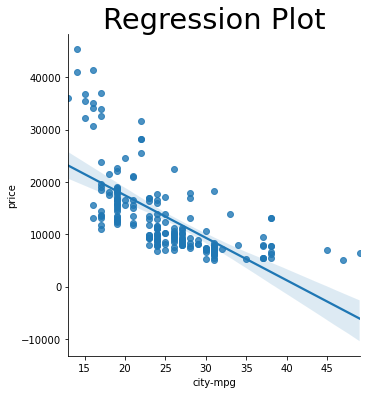

In [87]:
plt.figure(figsize=(8,8)) #plot 8 by 8 figure
sns.lmplot(x='city-mpg',y='price',data=autoMobile) #visualize linear relation ship for city miles to price
plt.title("Regression Plot",fontsize=29)
plt.show()

In [88]:
x=autoMobile[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X=x.iloc[:,:]
Y=autoMobile['price']
X

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22
...,...,...,...,...
200,114,2952,141,28
201,160,3049,141,25
202,134,3012,173,23
203,106,3217,145,27


In [89]:
df2=pd.DataFrame(X,columns=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'])
df2['price']=pd.Series(Y)

In [90]:
#formula='Q("horsepower") + Q("curb-weight") + Q("engine-size") + Q("highway-mpg")'
model=smf.ols('Q("price") ~ Q("horsepower") + Q("curb-weight") + Q("engine-size") + Q("highway-mpg")',data=df2)

In [91]:
results_formula=model.fit()

In [92]:
results_formula.params

Intercept          -9218.048907
Q("horsepower")       18.182255
Q("curb-weight")       3.801067
Q("engine-size")     101.072143
Q("highway-mpg")     -65.338357
dtype: float64

In [93]:
results_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q("price")   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     171.2
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           4.13e-63
Time:                        22:11:56   Log-Likelihood:                -1957.6
No. Observations:                 203   AIC:                             3925.
Df Residuals:                     198   BIC:                             3942.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9218.0489   4436.913     -2.078      0.039    -1.8e+04    -468.380
Q("horsepower")     18.1823     13.472      1.350      0.179      -8.384      44.748
Q("curb-weight")     3.8011      1.194      3.183      0.002       1.446       6.156
Q("engine-size")   101.0721     14.478      6.981      0.000      72.522     129.623
Q("highway-mpg")   -65.3384     74.212     -0.880      0.380    -211.686      81.010
==============================================================================
Omnibus:                       25.282   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.960
Skew:                           0.512   Prob(JB):                     7.84e-15
Kurtosis:                       5.575   Cond. No.                     4.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation:-

R-squared: is 0.776, which is a strong indication of price to 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'
with highway mpg negative and intercept is statistically insignificant with a negative value and hight R-squared.